# Computer Vision Course Project
# Vision Based Speed Estimation
# PID: 26
# Group Members: Sanmit Patil (61), Pushkar Pawar (64), Vipul Pisal (68)
# DIV: ETC-C

In [7]:
import numpy as np
import pandas as pd
import os
import csv
import cv2
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression  
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV
import sklearn.metrics as metrics
from sklearn.metrics import accuracy_score
from sklearn import preprocessing
from sklearn.metrics import confusion_matrix
import pickle

import warnings
warnings.filterwarnings('ignore')

In [2]:
folder1='..\cropped_data_processed/positive'
folder2='..\cropped_data_processed/negative'

In [3]:
def standard(data):
    mean = np.mean(data)
    std_dev = np.std(data)
    ans=[]
    for i in data:
        s = (i-mean)/std_dev
        ans.append(s)
    return ans

## Feature Extraction using FAST-FREAK for Positive Images

* FAST: Feature detector. It gives keypoints.
* FREAK: Feature descriptors. It describes the the given keypoints.
* the descriptor obtained is of 64 columns

In [4]:
i=0
for filename in os.listdir(folder1):
    
    path=os.path.join(folder1,filename)
    a=cv2.imread(path)
    
    #resize image
    resize=(198,120)
    img=cv2.resize(a,resize)
    
    #gray image
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    
    fast = cv2.FastFeatureDetector_create() 
    keypoints = fast.detect(gray, None)

    freak = cv2.xfeatures2d.FREAK_create()
    freakExtractor = cv2.xfeatures2d.FREAK_create()
    keypoints, descriptors= freakExtractor.compute(gray ,keypoints)
    
    #convert the descriptor array into a dataframe format
    out=pd.DataFrame(descriptors)
    print("descriptor shape ",i," : ", out.shape)
    i=i+1
    
    #drop first coloumn as it's the no of feature detected. Not required.
    #append to the csv file
    csv_data=out.to_csv('Str.csv', mode='a', header=False,index=False)

descriptor shape  0  :  (512, 64)
descriptor shape  1  :  (676, 64)
descriptor shape  2  :  (598, 64)
descriptor shape  3  :  (714, 64)
descriptor shape  4  :  (633, 64)
descriptor shape  5  :  (640, 64)
descriptor shape  6  :  (726, 64)
descriptor shape  7  :  (651, 64)
descriptor shape  8  :  (554, 64)
descriptor shape  9  :  (741, 64)
descriptor shape  10  :  (714, 64)
descriptor shape  11  :  (635, 64)
descriptor shape  12  :  (638, 64)
descriptor shape  13  :  (520, 64)
descriptor shape  14  :  (705, 64)
descriptor shape  15  :  (637, 64)
descriptor shape  16  :  (698, 64)
descriptor shape  17  :  (635, 64)
descriptor shape  18  :  (675, 64)
descriptor shape  19  :  (728, 64)
descriptor shape  20  :  (704, 64)
descriptor shape  21  :  (591, 64)
descriptor shape  22  :  (734, 64)
descriptor shape  23  :  (740, 64)
descriptor shape  24  :  (622, 64)
descriptor shape  25  :  (624, 64)
descriptor shape  26  :  (563, 64)
descriptor shape  27  :  (557, 64)
descriptor shape  28  :  (662,

In [5]:
data1 = pd.read_csv('Str.csv',header=None,dtype='uint8')
data1=data1.astype(np.uint8) 
data1

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,134,33,8,176,3,66,214,138,64,128,...,112,72,16,67,157,49,8,51,241,74
1,130,2,16,166,129,136,34,4,109,1,...,187,41,50,243,19,180,64,83,32,73
2,202,232,9,42,74,218,130,66,232,161,...,97,170,24,44,0,44,9,88,118,201
3,150,252,130,133,4,4,28,167,3,229,...,48,174,110,19,16,81,52,113,84,238
4,135,79,2,115,239,88,12,130,45,7,...,235,162,51,1,244,54,164,248,148,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1585034,148,175,119,201,200,221,130,245,122,93,...,8,75,110,84,6,37,82,89,107,250
1585035,10,219,155,171,54,217,156,207,207,138,...,245,122,145,162,58,239,113,77,87,243
1585036,218,203,135,253,235,203,122,238,141,161,...,156,74,65,254,51,249,120,86,147,255
1585037,10,5,44,152,7,71,4,63,37,224,...,148,24,25,226,43,156,73,70,46,249


## Feature Extraction using FAST-FREAK for Negative Images

In [6]:
i=0
for filename in os.listdir(folder2):
    
    path=os.path.join(folder2,filename)
    
    a=cv2.imread(path)
    resize=(198,120)
    img=cv2.resize(a,resize)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    
    fast = cv2.FastFeatureDetector_create() 
    keypoints = fast.detect(gray, None)

    freak = cv2.xfeatures2d.FREAK_create()
    freakExtractor = cv2.xfeatures2d.FREAK_create()
    keypoints, descriptors= freakExtractor.compute(gray ,keypoints)
    
    out=pd.DataFrame(descriptors)
    print("descriptor shape ",i," : ", out.shape)
    i=i+1
    
    csv_data=out.to_csv('Nstr.csv', mode='a', header=False,index=False)

descriptor shape  0  :  (829, 64)
descriptor shape  1  :  (793, 64)
descriptor shape  2  :  (920, 64)
descriptor shape  3  :  (999, 64)
descriptor shape  4  :  (848, 64)
descriptor shape  5  :  (924, 64)
descriptor shape  6  :  (683, 64)
descriptor shape  7  :  (951, 64)
descriptor shape  8  :  (762, 64)
descriptor shape  9  :  (639, 64)
descriptor shape  10  :  (946, 64)
descriptor shape  11  :  (920, 64)
descriptor shape  12  :  (900, 64)
descriptor shape  13  :  (843, 64)
descriptor shape  14  :  (866, 64)
descriptor shape  15  :  (978, 64)
descriptor shape  16  :  (613, 64)
descriptor shape  17  :  (1002, 64)
descriptor shape  18  :  (750, 64)
descriptor shape  19  :  (701, 64)
descriptor shape  20  :  (592, 64)
descriptor shape  21  :  (934, 64)
descriptor shape  22  :  (885, 64)
descriptor shape  23  :  (852, 64)
descriptor shape  24  :  (940, 64)
descriptor shape  25  :  (865, 64)
descriptor shape  26  :  (944, 64)
descriptor shape  27  :  (977, 64)
descriptor shape  28  :  (854

In [7]:
data2= pd.read_csv('Nstr.csv',header=None,dtype='uint8')
data2=data2.astype(np.uint8)
data2

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,2,7,0,130,1,140,4,1,38,64,...,186,11,17,114,50,53,64,81,32,234
1,5,134,44,8,137,220,165,69,36,86,...,135,8,144,64,42,164,64,211,42,240
2,5,6,44,8,9,156,161,89,164,94,...,205,24,24,0,42,172,66,215,46,112
3,5,6,32,0,73,154,163,90,164,94,...,205,0,0,2,54,164,66,215,40,112
4,197,6,128,32,217,42,38,218,4,42,...,156,1,16,160,51,181,76,87,32,122
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2002120,211,201,153,214,104,74,88,6,90,33,...,54,235,217,115,56,121,92,37,17,174
2002121,51,213,88,58,21,168,92,31,99,226,...,113,108,25,179,191,251,24,211,238,75
2002122,7,236,128,46,201,200,244,15,89,33,...,120,160,62,203,174,168,178,101,144,78
2002123,99,174,33,40,200,222,35,65,201,70,...,106,178,109,79,82,225,227,219,92,102


## Combine the Extracted Positive and Negative feature vectors into 1 dataframe

In [8]:
data=data1.append(data2)
csv_data=data.to_csv('Sift_Final.csv', mode='a', header=False,index=False)
data

/tmp/ipykernel_237987/881384686.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data=data1.append(data2)


,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,134,33,8,176,3,66,214,138,64,128,...,112,72,16,67,157,49,8,51,241,74
1,130,2,16,166,129,136,34,4,109,1,...,187,41,50,243,19,180,64,83,32,73
2,202,232,9,42,74,218,130,66,232,161,...,97,170,24,44,0,44,9,88,118,201
3,150,252,130,133,4,4,28,167,3,229,...,48,174,110,19,16,81,52,113,84,238
4,135,79,2,115,239,88,12,130,45,7,...,235,162,51,1,244,54,164,248,148,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2002120,211,201,153,214,104,74,88,6,90,33,...,54,235,217,115,56,121,92,37,17,174
2002121,51,213,88,58,21,168,92,31,99,226,...,113,108,25,179,191,251,24,211,238,75
2002122,7,236,128,46,201,200,244,15,89,33,...,120,160,62,203,174,168,178,101,144,78
2002123,99,174,33,40,200,222,35,65,201,70,...,106,178,109,79,82,225,227,219,92,102


* Total size of obtained feature vectors is ~3.6 million rows and 64 columns
* ~1.6 million rows of positive feature vectors and ~2 million rows from negative feature vectors

## Elbow Method to find optimal value of K for k-means

* We calculate 'within cluster sum of squares' for every value of k for which kmeans model has been fitted.
* WCSS tells us about the variability of the observations within each cluster. So lesser the WCSS, the cluster will be more compact.
* From the graph obtained in the elbow method, optimal k value is the one where the curve starts to flatten or slope becomes very less.

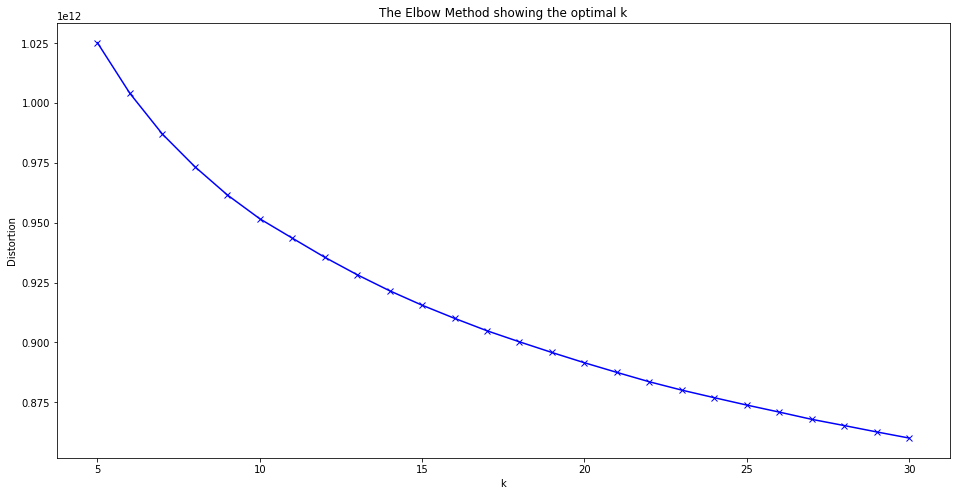

In [22]:
import matplotlib.pyplot as plt
%matplotlib inline 

#data = pd.read_csv('Sift_Final.csv')

distortions = []
K = range(5,31)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(data)
    print(k,':',kmeanModel.inertia_)
    distortions.append(kmeanModel.inertia_)

plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

## K Means Clustering

* Divide the feature vectors we have obtained into different clusters using the K-Means algorithm

In [5]:
data = pd.read_csv('Sift_Final.csv')

In [12]:
#intialize kmeans object with optimized k value we got from the elbow method
kmeans = KMeans(n_clusters=19)
kmeans.fit(data)

KMeans(n_clusters=19)

In [13]:
import pickle

# save the model to disk
filename = 'Kmeans_CL_Model19.sav'
pickle.dump(kmeans, open(filename, 'wb'))

In [6]:
with open(r"Kmeans_CL_Model19.sav", "rb") as input_file:
        kmeans = pickle.load(input_file)

c:\users\sanmit\appdata\local\programs\python\python39\lib\site-packages\sklearn\base.py:310: UserWarning: Trying to unpickle estimator KMeans from version 1.0.2 when using version 0.24.2. This might lead to breaking code or invalid results. Use at your own risk.
  warnings.warn(


### Creating the histogram for the kmeans labels
* The histogram will show how many feature vectors are there in each cluster.

In [7]:
hist=np.histogram(kmeans.labels_,bins=[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20])

print('histogram of trained kmeans')
print(hist,"\n")

histogram of trained kmeans
(array([178383, 171396, 193575, 179192, 197625, 181445, 189019, 199425,
       167294, 228911, 246652, 166152, 224183, 171917, 170800, 185350,
       150936, 206834, 178074,      0], dtype=int64), array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20])) 



### Making predictions using the kmeans model we trained
* Positive is represented as 0
* Negative is represented as 1
* Normalization is done by dividing the histogram values by the number of keypoints for that image

In [10]:
#initialising i=0 for positive class
i=0
data=[]

for filename in os.listdir(folder1):
    path=os.path.join(folder1,filename)
    a=cv2.imread(path)
    resize=(198,120)
    img=cv2.resize(a,resize)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    
    fast = cv2.FastFeatureDetector_create() 
    keypoints = fast.detect(gray, None)

    freak = cv2.xfeatures2d.FREAK_create()
    freakExtractor = cv2.xfeatures2d.FREAK_create()
    keypoints, descriptors= freakExtractor.compute(gray ,keypoints)
    
    out=pd.DataFrame(descriptors)
    array_double = np.array(out, dtype=np.double)
    a=kmeans.predict(array_double)
    
    hist=np.histogram(a,bins=[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20])
    
    data.append(hist[0]/len(keypoints))
    
Output = pd.DataFrame(data)
Output["Class"] = i 
csv_data=Output.to_csv('FinalStr19.csv', mode='a',header=False,index=False)

### Displaying the Predictions made for positive images

In [12]:
print("Positive")
dat1= pd.read_csv('FinalStr19.csv',header=None)
print(dat1)

Positive
            0         1         2         3         4         5         6   \
0     0.048711  0.041547  0.067335  0.057307  0.070201  0.044413  0.038682   
1     0.065466  0.032733  0.055646  0.044190  0.065466  0.044190  0.040917   
2     0.038095  0.036508  0.049206  0.052381  0.063492  0.050794  0.031746   
3     0.039326  0.058989  0.063202  0.046348  0.049157  0.042135  0.054775   
4     0.032419  0.053616  0.078554  0.051122  0.044888  0.049875  0.034913   
...        ...       ...       ...       ...       ...       ...       ...   
2422  0.058036  0.022321  0.035714  0.071429  0.063988  0.052083  0.040179   
2423  0.045317  0.028701  0.060423  0.051360  0.046828  0.060423  0.043807   
2424  0.063802  0.039062  0.048177  0.055990  0.074219  0.057292  0.035156   
2425  0.039474  0.055921  0.062500  0.059211  0.087171  0.027961  0.047697   
2426  0.058480  0.033626  0.042398  0.046784  0.051170  0.045322  0.057018   

            7         8         9   ...        11     

In [11]:
#initialising i=1 for negative class
i=1
data=[]
for filename in os.listdir(folder2):
    path=os.path.join(folder2,filename)
    a=cv2.imread(path)
    resize=(198,120)
    img=cv2.resize(a,resize)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    
    fast = cv2.FastFeatureDetector_create() 
    keypoints = fast.detect(gray, None)

    freak = cv2.xfeatures2d.FREAK_create()
    freakExtractor = cv2.xfeatures2d.FREAK_create()
    keypoints, descriptors= freakExtractor.compute(gray ,keypoints)
    
    out=pd.DataFrame(descriptors)
    array_double = np.array(out, dtype=np.double)
    a=kmeans.predict(array_double)
    
    hist=np.histogram(a,bins=[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20])
    
    data.append(hist[0]/len(keypoints))
    
Output = pd.DataFrame(data)
Output["Class"] = i 
csv_data=Output.to_csv('FinalNstr19.csv', mode='a',header=False,index=False)

### Displaying the Predictions made for negative images

In [13]:
print("Negative")
dat2= pd.read_csv('FinalNstr19.csv',header=None)
print(dat2)

Negative
            0         1         2         3         4         5         6   \
0     0.045330  0.070055  0.056319  0.041209  0.023352  0.041209  0.048077   
1     0.050375  0.067524  0.063237  0.047160  0.056806  0.051447  0.072883   
2     0.048338  0.068479  0.041289  0.040282  0.064451  0.044310  0.088620   
3     0.053571  0.032143  0.044048  0.047619  0.053571  0.050000  0.045238   
4     0.047619  0.055556  0.061508  0.036706  0.042659  0.047619  0.064484   
...        ...       ...       ...       ...       ...       ...       ...   
2427  0.060204  0.051020  0.062245  0.047959  0.046939  0.052041  0.061224   
2428  0.074291  0.063539  0.028348  0.042033  0.043988  0.044966  0.055718   
2429  0.057069  0.068742  0.037613  0.045396  0.060960  0.051881  0.057069   
2430  0.053922  0.044118  0.056373  0.064951  0.067402  0.056373  0.060049   
2431  0.054917  0.026820  0.062580  0.057471  0.043423  0.061303  0.026820   

            7         8         9   ...        11     

### Combining Predictions of all images

In [14]:
A=dat1.append(dat2)
csv_data=A.to_csv('FinalFV19.csv', mode='a',header=False,index=False)

In [15]:
A = pd.read_csv('FinalFV19.csv')

### Seperating the data into independent(x) and dependent(Y) columns

In [16]:
#independent data/input columns
x = A.iloc[:,0:19].values
x

array([[0.06546645, 0.03273322, 0.05564648, ..., 0.04255319, 0.06382979,
        0.05728314],
       [0.03809524, 0.03650794, 0.04920635, ..., 0.05396825, 0.06507937,
        0.03650794],
       [0.03932584, 0.05898876, 0.06320225, ..., 0.01544944, 0.06460674,
        0.04634831],
       ...,
       [0.05706874, 0.06874189, 0.03761349, ..., 0.04280156, 0.04280156,
        0.04928664],
       [0.05392157, 0.04411765, 0.05637255, ..., 0.03553922, 0.04411765,
        0.03186275],
       [0.05491699, 0.02681992, 0.06257982, ..., 0.0357599 , 0.08301405,
        0.03831418]])

In [17]:
#dependent data/output column
y = A.iloc[:,-1].values
y

array([0, 0, 0, ..., 1, 1, 1], dtype=int64)

## Feature Scaling
### Standardization
* It is a scaling technique where the values are centered around the mean with a range of -3 to +3

In [19]:
x_scaled = standard(x)

## Dimensionality Reduction
### Principal Component Analaysis
* It is a statistical method by which most of the original data can be summarized using lesser number of dimensions

In [20]:
from sklearn.decomposition import PCA

pca = PCA(n_components=None)
pca.fit(x_scaled)

PCA()

In [21]:
x_reduced = pca.transform(x_scaled)
x_reduced

array([[-3.81214904e-01,  7.02751702e-01,  2.58655348e-01, ...,
         5.87042707e-02,  4.65119459e-03,  3.64650801e-15],
       [-5.32209446e-01,  1.16110469e+00,  7.83811806e-01, ...,
         8.99157395e-02,  5.84048929e-01, -5.18376570e-16],
       [ 5.00683961e-01,  4.31218234e-01, -2.34091150e+00, ...,
         3.44586043e-01, -1.58766336e-04,  1.54547942e-15],
       ...,
       [ 1.18744153e+00,  7.49419806e-01,  1.38118852e+00, ...,
         5.57542511e-01, -6.64666139e-02,  1.00683001e-16],
       [-3.21405817e-01, -1.60278770e+00, -3.64486006e-01, ...,
         3.19255203e-01, -9.05604033e-01,  1.49126573e-15],
       [-2.08039231e+00, -9.52537149e-01, -2.01890263e+00, ...,
         2.41725201e-01, -1.56806655e-01,  1.83836970e-15]])

In [22]:
x_reduced = pd.DataFrame(x_reduced)
x_reduced

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,-0.381215,0.702752,0.258655,0.853839,0.013505,-0.925841,-0.931235,0.561437,0.385169,-0.540114,-0.103126,0.448959,-0.398113,0.184860,-0.333894,1.108641,0.058704,0.004651,3.646508e-15
1,-0.532209,1.161105,0.783812,1.575720,1.255707,-0.224090,-0.426738,-0.195112,0.055897,-0.293189,1.989393,0.193078,-0.527010,1.089694,0.121103,-0.841986,0.089916,0.584049,-5.183766e-16
2,0.500684,0.431218,-2.340912,2.080746,-0.255656,0.893876,0.876047,-0.197131,0.458022,0.816331,0.902200,-0.109837,0.301578,0.263583,-0.239040,-0.204584,0.344586,-0.000159,1.545479e-15
3,-2.437446,-2.474511,-3.371917,-0.254966,-1.355551,0.729312,-1.183383,0.027194,-0.159033,0.059281,-0.260303,-0.313532,0.505909,0.180015,0.233971,-0.490342,0.736627,0.388558,-4.861066e-16
4,-2.015794,-0.547746,-2.166517,-0.716453,-0.233813,-1.112787,1.104893,-0.127984,-0.072311,-0.184188,0.346399,0.635798,-0.464270,0.205347,0.178679,-0.131311,0.166563,0.175438,-2.944416e-15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4853,2.465248,-0.526684,0.154365,-0.956308,-0.501218,0.258172,0.626200,0.787051,-0.910582,-0.678310,-0.277521,0.320648,0.016307,0.073782,0.136122,-0.245835,0.151205,-0.506406,1.918264e-15
4854,2.589373,2.228253,1.455572,-0.755909,-0.192565,-0.559783,0.047335,-0.221941,-0.309942,0.466261,-0.310533,0.717680,0.383439,-0.607533,0.116088,-0.020887,0.788312,0.101346,1.757196e-15
4855,1.187442,0.749420,1.381189,0.905419,-0.719355,-0.392865,0.427476,-0.458183,-0.084418,0.228903,-0.343723,-0.633872,-0.783854,0.325860,1.126895,0.285650,0.557543,-0.066467,1.006830e-16
4856,-0.321406,-1.602788,-0.364486,0.208580,-0.987238,-0.421537,0.285712,0.458111,-0.691284,0.349585,-0.296149,-0.451409,0.173999,0.513727,-0.775897,-0.683848,0.319255,-0.905604,1.491266e-15


In [23]:
x_reduced.shape

(4858, 19)

### The values below tell us how much information we can get by using each column individually

In [24]:
pca.explained_variance_ratio_ 

array([3.65320654e-01, 1.19214177e-01, 1.03094239e-01, 6.16231295e-02,
       4.73344965e-02, 3.94670787e-02, 3.62727003e-02, 2.86918050e-02,
       2.69178818e-02, 2.41011403e-02, 2.34965168e-02, 2.16624022e-02,
       2.02013273e-02, 1.89665066e-02, 1.70132782e-02, 1.64856012e-02,
       1.57539923e-02, 1.43830729e-02, 4.80439716e-31])

In [28]:
h = [3.65377760e-01, 1.19162596e-01, 1.03118473e-01, 6.16078089e-02,
       4.73218778e-02, 3.94521446e-02, 3.62646383e-02, 2.86824125e-02,
       2.69437685e-02, 2.41044072e-02, 2.34976625e-02, 2.16600034e-02,
       2.01830381e-02, 1.89634402e-02, 1.70186403e-02, 1.64982617e-02,
       1.57595322e-02]
sum(h)

0.9856164651999999

### From the above values we select the number of columns such that we will get around 98% of the total information
* In our case we chose 17

In [29]:
pca = PCA(n_components=17)
pca.fit(x_scaled)

PCA(n_components=17)

In [30]:
pickle.dump(pca, open("pca.pkl","wb"))

c:\users\sanmit\appdata\local\programs\python\python39\lib\site-packages\sklearn\base.py:310: UserWarning: Trying to unpickle estimator KMeans from version 1.0.2 when using version 0.24.2. This might lead to breaking code or invalid results. Use at your own risk.
  warnings.warn(


In [31]:
x_reduced = pca.transform(x_scaled)
x_reduced

array([[-0.3812149 ,  0.7027517 ,  0.25865535, ..., -0.33389402,
         1.10864085,  0.05870427],
       [-0.53220945,  1.16110469,  0.78381181, ...,  0.12110319,
        -0.8419861 ,  0.08991574],
       [ 0.50068396,  0.43121823, -2.3409115 , ..., -0.23903998,
        -0.20458409,  0.34458604],
       ...,
       [ 1.18744153,  0.74941981,  1.38118852, ...,  1.12689515,
         0.2856504 ,  0.55754251],
       [-0.32140582, -1.6027877 , -0.36448601, ..., -0.77589696,
        -0.68384781,  0.3192552 ],
       [-2.08039231, -0.95253715, -2.01890263, ..., -0.26925669,
         0.41774192,  0.2417252 ]])

In [32]:
x_reduced.shape

(4858, 17)

##### The original shape was 4858*19.
##### After dimensionality reduction it is 4858*17

In [33]:
print(pca.explained_variance_ratio_) 

[0.36532065 0.11921418 0.10309424 0.06162313 0.0473345  0.03946708
 0.0362727  0.0286918  0.02691788 0.02410114 0.02349652 0.0216624
 0.02020133 0.01896651 0.01701328 0.0164856  0.01575399]


In [34]:
x_reduced = pd.DataFrame(x_reduced)
x_reduced

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,-0.381215,0.702752,0.258655,0.853839,0.013505,-0.925841,-0.931235,0.561437,0.385169,-0.540114,-0.103126,0.448959,-0.398113,0.184860,-0.333894,1.108641,0.058704
1,-0.532209,1.161105,0.783812,1.575720,1.255707,-0.224090,-0.426738,-0.195112,0.055897,-0.293189,1.989393,0.193078,-0.527010,1.089694,0.121103,-0.841986,0.089916
2,0.500684,0.431218,-2.340912,2.080746,-0.255656,0.893876,0.876047,-0.197131,0.458022,0.816331,0.902200,-0.109837,0.301578,0.263583,-0.239040,-0.204584,0.344586
3,-2.437446,-2.474511,-3.371917,-0.254966,-1.355551,0.729312,-1.183383,0.027194,-0.159033,0.059281,-0.260303,-0.313532,0.505909,0.180015,0.233971,-0.490342,0.736627
4,-2.015794,-0.547746,-2.166517,-0.716453,-0.233813,-1.112787,1.104893,-0.127984,-0.072311,-0.184188,0.346399,0.635798,-0.464270,0.205347,0.178679,-0.131311,0.166563
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4853,2.465248,-0.526684,0.154365,-0.956308,-0.501218,0.258172,0.626200,0.787051,-0.910582,-0.678310,-0.277521,0.320648,0.016307,0.073782,0.136122,-0.245835,0.151205
4854,2.589373,2.228253,1.455572,-0.755909,-0.192565,-0.559783,0.047335,-0.221941,-0.309942,0.466261,-0.310533,0.717680,0.383439,-0.607533,0.116088,-0.020887,0.788312
4855,1.187442,0.749420,1.381189,0.905419,-0.719355,-0.392865,0.427476,-0.458183,-0.084418,0.228903,-0.343723,-0.633872,-0.783854,0.325860,1.126895,0.285650,0.557543
4856,-0.321406,-1.602788,-0.364486,0.208580,-0.987238,-0.421537,0.285712,0.458111,-0.691284,0.349585,-0.296149,-0.451409,0.173999,0.513727,-0.775897,-0.683848,0.319255


### Combine transformed X values with y values and save it

In [35]:
B=pd.concat([x_reduced, pd.DataFrame(y)],axis=1)
B

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,0
0,-0.381215,0.702752,0.258655,0.853839,0.013505,-0.925841,-0.931235,0.561437,0.385169,-0.540114,-0.103126,0.448959,-0.398113,0.184860,-0.333894,1.108641,0.058704,0
1,-0.532209,1.161105,0.783812,1.575720,1.255707,-0.224090,-0.426738,-0.195112,0.055897,-0.293189,1.989393,0.193078,-0.527010,1.089694,0.121103,-0.841986,0.089916,0
2,0.500684,0.431218,-2.340912,2.080746,-0.255656,0.893876,0.876047,-0.197131,0.458022,0.816331,0.902200,-0.109837,0.301578,0.263583,-0.239040,-0.204584,0.344586,0
3,-2.437446,-2.474511,-3.371917,-0.254966,-1.355551,0.729312,-1.183383,0.027194,-0.159033,0.059281,-0.260303,-0.313532,0.505909,0.180015,0.233971,-0.490342,0.736627,0
4,-2.015794,-0.547746,-2.166517,-0.716453,-0.233813,-1.112787,1.104893,-0.127984,-0.072311,-0.184188,0.346399,0.635798,-0.464270,0.205347,0.178679,-0.131311,0.166563,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4853,2.465248,-0.526684,0.154365,-0.956308,-0.501218,0.258172,0.626200,0.787051,-0.910582,-0.678310,-0.277521,0.320648,0.016307,0.073782,0.136122,-0.245835,0.151205,1
4854,2.589373,2.228253,1.455572,-0.755909,-0.192565,-0.559783,0.047335,-0.221941,-0.309942,0.466261,-0.310533,0.717680,0.383439,-0.607533,0.116088,-0.020887,0.788312,1
4855,1.187442,0.749420,1.381189,0.905419,-0.719355,-0.392865,0.427476,-0.458183,-0.084418,0.228903,-0.343723,-0.633872,-0.783854,0.325860,1.126895,0.285650,0.557543,1
4856,-0.321406,-1.602788,-0.364486,0.208580,-0.987238,-0.421537,0.285712,0.458111,-0.691284,0.349585,-0.296149,-0.451409,0.173999,0.513727,-0.775897,-0.683848,0.319255,1


In [36]:
csv_data=B.to_csv('FinalPCAFV19.csv', mode='a',header=False,index=False)

In [12]:
data= pd.read_csv('FinalPCAFV19.csv',header=None)
data

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,-0.381215,0.702752,0.258655,0.853839,0.013505,-0.925841,-0.931235,0.561437,0.385169,-0.540114,-0.103126,0.448959,-0.398113,0.184860,-0.333894,1.108641,0.058704,0
1,-0.532209,1.161105,0.783812,1.575720,1.255707,-0.224090,-0.426738,-0.195112,0.055897,-0.293189,1.989393,0.193078,-0.527010,1.089694,0.121103,-0.841986,0.089916,0
2,0.500684,0.431218,-2.340912,2.080746,-0.255656,0.893876,0.876047,-0.197131,0.458022,0.816331,0.902200,-0.109837,0.301578,0.263583,-0.239040,-0.204584,0.344586,0
3,-2.437446,-2.474511,-3.371917,-0.254966,-1.355551,0.729312,-1.183383,0.027194,-0.159033,0.059281,-0.260303,-0.313532,0.505909,0.180015,0.233971,-0.490342,0.736627,0
4,-2.015794,-0.547746,-2.166517,-0.716453,-0.233813,-1.112787,1.104893,-0.127984,-0.072311,-0.184188,0.346399,0.635798,-0.464270,0.205347,0.178679,-0.131311,0.166563,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4853,2.465248,-0.526684,0.154365,-0.956308,-0.501218,0.258172,0.626200,0.787051,-0.910582,-0.678310,-0.277521,0.320648,0.016307,0.073782,0.136122,-0.245835,0.151205,1
4854,2.589373,2.228253,1.455572,-0.755909,-0.192565,-0.559783,0.047335,-0.221941,-0.309942,0.466261,-0.310533,0.717680,0.383439,-0.607533,0.116088,-0.020887,0.788312,1
4855,1.187442,0.749420,1.381189,0.905419,-0.719355,-0.392865,0.427476,-0.458183,-0.084418,0.228903,-0.343723,-0.633872,-0.783854,0.325860,1.126895,0.285650,0.557543,1
4856,-0.321406,-1.602788,-0.364486,0.208580,-0.987238,-0.421537,0.285712,0.458111,-0.691284,0.349585,-0.296149,-0.451409,0.173999,0.513727,-0.775897,-0.683848,0.319255,1


### Seperate into X and y again so that we can split it and give it to the classifiers

In [13]:
x = data.iloc[:,0:17].values
print("X values")
print(x)

y = data.iloc[:,-1]
print("Y values")
print(y)

X values
[[-0.3812149   0.7027517   0.25865535 ... -0.33389402  1.10864085
   0.05870427]
 [-0.53220945  1.16110469  0.78381181 ...  0.12110319 -0.8419861
   0.08991574]
 [ 0.50068396  0.43121823 -2.3409115  ... -0.23903998 -0.20458409
   0.34458604]
 ...
 [ 1.18744153  0.74941981  1.38118852 ...  1.12689515  0.2856504
   0.55754251]
 [-0.32140582 -1.6027877  -0.36448601 ... -0.77589696 -0.68384781
   0.3192552 ]
 [-2.08039231 -0.95253715 -2.01890263 ... -0.26925669  0.41774192
   0.2417252 ]]
Y values
0       0
1       0
2       0
3       0
4       0
       ..
4853    1
4854    1
4855    1
4856    1
4857    1
Name: 17, Length: 4858, dtype: int64


### Split into Training and Testing data

In [14]:
#Dataset split into train and test with 80% Training and 20% Testing
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.20, random_state=10)

## Classification

### a) Decision Tree Classifier
* As the name suggests it has tree-like structure.
* In every node of the tree, a decision is made and accordingly the values are split into further nodes.
* max_depth parameter: depth of the tree or the number of times the values have to split in the tree.

In [8]:
from sklearn.metrics import accuracy_score
model1 = DecisionTreeClassifier(max_depth=13)
model1.fit(x_train, y_train)
y_pred1 = model1.predict(x_test)
print("Decision Tree Results")
print("Train Accuracy:",model1.score(x_train, y_train))
print("Test Accuracy:",model1.score(x_test, y_test))

tn, fp, fn, tp = confusion_matrix(y_test, y_pred1).ravel()
print('\nConfusion Matrix:\n',confusion_matrix(y_test, y_pred1))

print('\n+ve Precision:', tp/(tp+fp))
print('Recall:', tp/(tp+fn))
print('-ve Precision:', tn/(tn+fn))
print('Specificity:', tn/(tn+fp))
print("F1 Score: ",metrics.f1_score(y_test, y_pred1))

Decision Tree Results
Train Accuracy: 0.9879053010808029
Test Accuracy: 0.8168724279835391

Confusion Matrix:
 [[389  79]
 [ 99 405]]

+ve Precision: 0.8367768595041323
Recall: 0.8035714285714286
-ve Precision: 0.7971311475409836
Specificity: 0.8311965811965812
F1 Score:  0.819838056680162


### Performance Parameters:
* Accuracy: No of correct predictions out of total sample
* Confusion Matrix:
                    - true negative  false positive
                    - false negative  true positive
* Precision: Out of all values predicted as positive how many were actually positive (for +ve)
* Recall: Out all actually positive values, how many were correctly predicted as positive.
* Specificity: Out of all actually negative values, how many were corectly predicted as negative.
* F1 Score: Harmonic mean of precision and recall
* Area under curve for ROC: measures the ability of a classifier to distinguish between classes. The closer to 1 the better the classifier is 

Area under Curve: 0.7991749762583096


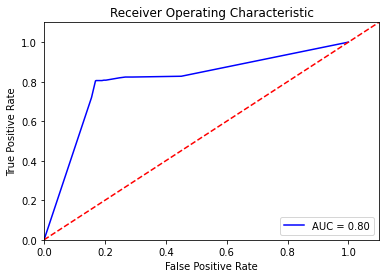

In [9]:
probs = model1.predict_proba(x_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)
print('Area under Curve:', roc_auc)

import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1.1], [0, 1.1],'r--')
plt.xlim([0, 1.1])
plt.ylim([0, 1.1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

### b) Random Forest Classifier 
* It uses multiple decision trees on subsets of data.
* It takes the average of outputs given by each decision tree and gives one single output.
* n_estimators parameter: no of trees to consider for tsking the average.

In [10]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix

model2 = RandomForestClassifier(n_estimators = 10)
model2.fit(x_train, y_train)
y_pred2 = model2.predict(x_test)

print("Random Forest Clasifier")
print("Train Accuracy:",model2.score(x_train, y_train))
print("Test Accuracy:",model2.score(x_test, y_test))

tn, fp, fn, tp = confusion_matrix(y_test, y_pred2).ravel()
print('\nConfusion Matrix:\n',confusion_matrix(y_test, y_pred2))

print('\n+ve Precision:', tp/(tp+fp))
print('Recall:', tp/(tp+fn))
print('-ve Precision:', tn/(tn+fn))
print('Specificity:', tn/(tn+fp))
print("F1 Score: ",metrics.f1_score(y_test, y_pred2))

Random Forest Clasifier
Train Accuracy: 1.0
Test Accuracy: 0.8847736625514403

Confusion Matrix:
 [[428  40]
 [ 72 432]]

+ve Precision: 0.9152542372881356
Recall: 0.8571428571428571
-ve Precision: 0.856
Specificity: 0.9145299145299145
F1 Score:  0.8852459016393444


In [14]:
pickle.dump(model2, open("rf.pkl","wb"))

Area under Curve: 0.9357538109271313


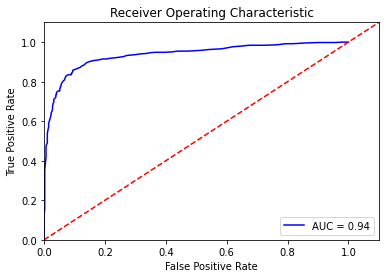

In [15]:
probs = model2.predict_proba(x_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)
print('Area under Curve:', roc_auc)

import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1.1], [0, 1.1],'r--')
plt.xlim([0, 1.1])
plt.ylim([0, 1.1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

### c) K Nearest Neigbours Classifier
* Finds the closest k data points to the selected one.
* Takes the majority of the classes to which those k points belong to and gives that as the output.

In [11]:
from sklearn.neighbors import KNeighborsClassifier
model3 = KNeighborsClassifier(n_neighbors = 9)
model3.fit(x_train, y_train)
y_pred3 = model3.predict(x_test)
print("KNN")
print("Train Accuracy:",model3.score(x_train, y_train))
print("Test Accuracy:",model3.score(x_test, y_test))

tn, fp, fn, tp = confusion_matrix(y_test, y_pred3).ravel()
print('\nConfusion Matrix:\n',confusion_matrix(y_test, y_pred3))

print('\n+ve Precision:', tp/(tp+fp))
print('Recall:', tp/(tp+fn))
print('-ve Precision:', tn/(tn+fn))
print('Specificity:', tn/(tn+fp))
print("F1 Score: ",metrics.f1_score(y_test, y_pred3))

KNN
Train Accuracy: 0.8996397323726196
Test Accuracy: 0.8847736625514403

Confusion Matrix:
 [[420  48]
 [ 64 440]]

+ve Precision: 0.9016393442622951
Recall: 0.873015873015873
-ve Precision: 0.8677685950413223
Specificity: 0.8974358974358975
F1 Score:  0.8870967741935485


In [17]:
pickle.dump(model3, open("knn.pkl","wb"))

Area under Curve: 0.9410956467982945


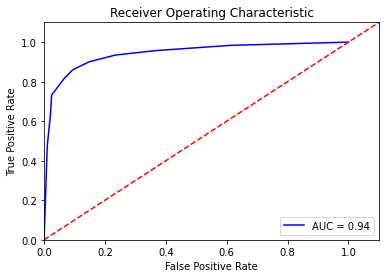

In [45]:
probs = model3.predict_proba(x_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)
print('Area under Curve:', roc_auc)

import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1.1], [0, 1.1],'r--')
plt.xlim([0, 1.1])
plt.ylim([0, 1.1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

### d) SVM Linear Classifier

In [8]:
from sklearn import svm
model5 = svm.SVC(kernel='linear', probability=True)
model5.fit(x_train, y_train)
y_pred5 = model5.predict(x_test)
print("SVM Linear kernel")
print("Train Accuracy:",model5.score(x_train, y_train))
print("Test Accuracy:",model5.score(x_test, y_test))

tn, fp, fn, tp = confusion_matrix(y_test, y_pred5).ravel()
print('\nConfusion Matrix:\n',confusion_matrix(y_test, y_pred5))

print('\n+ve Precision:', tp/(tp+fp))
print('Recall:', tp/(tp+fn))
print('-ve Precision:', tn/(tn+fn))
print('Specificity:', tn/(tn+fp))
print("F1 Score: ",metrics.f1_score(y_test, y_pred5))

SVM Linear kernel
Train Accuracy: 0.8862583633556356
Test Accuracy: 0.8775720164609053

Confusion Matrix:
 [[431  58]
 [ 61 422]]

+ve Precision: 0.8791666666666667
Recall: 0.8737060041407867
-ve Precision: 0.8760162601626016
Specificity: 0.8813905930470347
F1 Score:  0.8764278296988578


Area under Curve: 0.9486762607594827


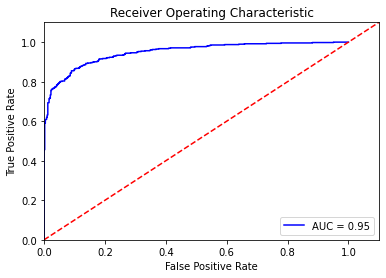

In [9]:
probs = model5.predict_proba(x_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)
print('Area under Curve:', roc_auc)

import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1.1], [0, 1.1],'r--')
plt.xlim([0, 1.1])
plt.ylim([0, 1.1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

### e) SVM Polynomial Classifier

In [10]:
from sklearn.svm import SVC
model6 = SVC(kernel='poly', degree=3, probability=True)
model6.fit(x_train, y_train)
y_pred6 = model6.predict(x_test)
print("SVM Polynomial")
print("Train Accuracy:",model6.score(x_train, y_train))
print("Test Accuracy:",model6.score(x_test, y_test))

tn, fp, fn, tp = confusion_matrix(y_test, y_pred6).ravel()
print('\nConfusion Matrix:\n',confusion_matrix(y_test, y_pred6))

print('\n+ve Precision:', tp/(tp+fp))
print('Recall:', tp/(tp+fn))
print('-ve Precision:', tn/(tn+fn))
print('Specificity:', tn/(tn+fp))
print("F1 Score: ",metrics.f1_score(y_test, y_pred6))

SVM Polynomial
Train Accuracy: 0.9107050952135872
Test Accuracy: 0.8806584362139918

Confusion Matrix:
 [[432  57]
 [ 59 424]]

+ve Precision: 0.8814968814968815
Recall: 0.8778467908902692
-ve Precision: 0.879837067209776
Specificity: 0.8834355828220859
F1 Score:  0.8796680497925312


Area under Curve: 0.9315140122021957


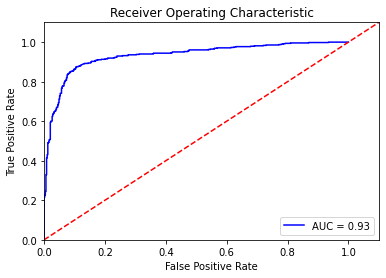

In [11]:
probs = model6.predict_proba(x_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)
print('Area under Curve:', roc_auc)

import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1.1], [0, 1.1],'r--')
plt.xlim([0, 1.1])
plt.ylim([0, 1.1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

### f) SVM Sigmoid Classifier

In [12]:
from sklearn.svm import SVC
model7 = SVC(kernel='sigmoid', probability=True)
model7.fit(x_train, y_train)
y_pred7 = model7.predict(x_test)
print("SVM sigmoid")
print("Train Accuracy:",model7.score(x_train, y_train))
print("Test Accuracy:",model7.score(x_test, y_test))

tn, fp, fn, tp = confusion_matrix(y_test, y_pred7).ravel()
print('\nConfusion Matrix:\n',confusion_matrix(y_test, y_pred7))

print('\n+ve Precision:', tp/(tp+fp))
print('Recall:', tp/(tp+fn))
print('-ve Precision:', tn/(tn+fn))
print('Specificity:', tn/(tn+fp))
print("F1 Score: ",metrics.f1_score(y_test, y_pred7))

SVM sigmoid
Train Accuracy: 0.7933607822954195
Test Accuracy: 0.8004115226337448

Confusion Matrix:
 [[387 102]
 [ 92 391]]

+ve Precision: 0.7931034482758621
Recall: 0.8095238095238095
-ve Precision: 0.8079331941544885
Specificity: 0.7914110429447853
F1 Score:  0.8012295081967212


Area under Curve: 0.8787846071121611


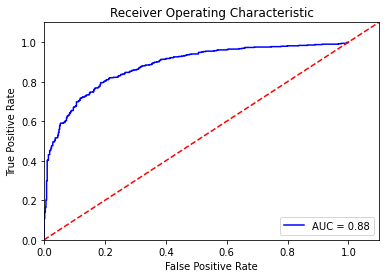

In [13]:
probs = model7.predict_proba(x_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)
print('Area under Curve:', roc_auc)

import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1.1], [0, 1.1],'r--')
plt.xlim([0, 1.1])
plt.ylim([0, 1.1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

### g) SVM RBF Kernel Classifier 
* Support Vector Machine (SVM) is based on creating hyperplanes such that it can divide the space into several classes.
* RBF: Radial Basis Function kernel. It uses two values gamma and c
* gamma: decides the spread of the decision region
* c: penalty for misclassifying a point

In [15]:
from sklearn.svm import SVC
model8 = SVC(kernel='rbf',probability=True)
model8.fit(x_train, y_train)
y_pred8 = model8.predict(x_test)
print("SVM rbf")
print("Train Accuracy:",model8.score(x_train, y_train))
print("Test Accuracy:",model8.score(x_test, y_test))

tn, fp, fn, tp = confusion_matrix(y_test, y_pred8).ravel()
print('\nConfusion Matrix:\n',confusion_matrix(y_test, y_pred8))

print('\n+ve Precision:', tp/(tp+fp))
print('Recall:', tp/(tp+fn))
print('-ve Precision:', tn/(tn+fn))
print('Specificity:', tn/(tn+fp))
print("F1 Score: ",metrics.f1_score(y_test, y_pred8))

SVM rbf
Train Accuracy: 0.9197117858980958
Test Accuracy: 0.8940329218106996

Confusion Matrix:
 [[430  38]
 [ 65 439]]

+ve Precision: 0.9203354297693921
Recall: 0.871031746031746
-ve Precision: 0.8686868686868687
Specificity: 0.9188034188034188
F1 Score:  0.8950050968399592


Area under Curve: 0.9540862341269674


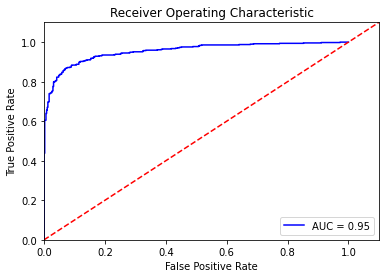

In [53]:
probs = model8.predict_proba(x_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)
print("Area under Curve:", roc_auc)
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1.1], [0, 1.1],'r--')
plt.xlim([0, 1.1])
plt.ylim([0, 1.1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [59]:
pickle.dump(model8, open("svm_rbf.pkl","wb"))

### h) XGBoost Classifier
* Based on bossting i.e. combining a predictions of weak learners to form a strong learner

In [16]:
from xgboost import XGBClassifier
model9 = XGBClassifier()
model9.fit(x_train, y_train)
y_pred9 = model9.predict(x_test)
print("SVM rbf")
print("Train Accuracy:",model9.score(x_train, y_train))
print("Test Accuracy:",model9.score(x_test, y_test))

tn, fp, fn, tp = confusion_matrix(y_test, y_pred9).ravel()
print('\nConfusion Matrix:\n',confusion_matrix(y_test, y_pred9))

print('\n+ve Precision:', tp/(tp+fp))
print('Recall:', tp/(tp+fn))
print('-ve Precision:', tn/(tn+fn))
print('Specificity:', tn/(tn+fp))
print("F1 Score: ",metrics.f1_score(y_test, y_pred9))

[13:23:13] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
SVM rbf
Train Accuracy: 1.0
Test Accuracy: 0.8847736625514403

Confusion Matrix:
 [[418  50]
 [ 62 442]]

+ve Precision: 0.8983739837398373
Recall: 0.876984126984127
-ve Precision: 0.8708333333333333
Specificity: 0.8931623931623932
F1 Score:  0.8950050968399592


Area under Curve: 0.9480056980056979


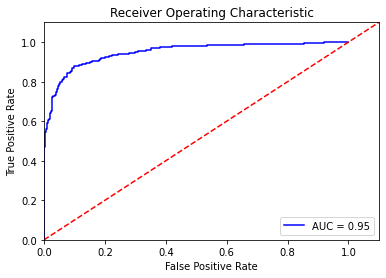

In [17]:
probs = model9.predict_proba(x_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)
print("Area under Curve:", roc_auc)
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1.1], [0, 1.1],'r--')
plt.xlim([0, 1.1])
plt.ylim([0, 1.1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

### i) Logistic Regression
* Used mainly to predict binary outcomes
* It fits an "S" shaped logistic function, which predicts two maximum values (0 or 1).

In [8]:
from sklearn.linear_model import LogisticRegression  
model9 = LogisticRegression()
model9.fit(x_train, y_train)
y_pred9 = model9.predict(x_test)
print("SVM rbf")
print("Train Accuracy:",model9.score(x_train, y_train))
print("Test Accuracy:",model9.score(x_test, y_test))

tn, fp, fn, tp = confusion_matrix(y_test, y_pred9).ravel()
print('\nConfusion Matrix:\n',confusion_matrix(y_test, y_pred9))

print('\n+ve Precision:', tp/(tp+fp))
print('Recall:', tp/(tp+fn))
print('-ve Precision:', tn/(tn+fn))
print('Specificity:', tn/(tn+fp))
print("F1 Score: ",metrics.f1_score(y_test, y_pred9))

SVM rbf
Train Accuracy: 0.8857436953165209
Test Accuracy: 0.8683127572016461

Confusion Matrix:
 [[436  62]
 [ 66 408]]

+ve Precision: 0.8680851063829788
Recall: 0.8607594936708861
-ve Precision: 0.8685258964143426
Specificity: 0.8755020080321285
F1 Score:  0.864406779661017


Area under Curve: 0.945787368884822


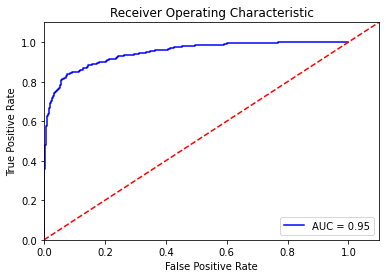

In [9]:
probs = model9.predict_proba(x_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)
print("Area under Curve:", roc_auc)
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1.1], [0, 1.1],'r--')
plt.xlim([0, 1.1])
plt.ylim([0, 1.1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

### j) Naive Bayes Classifier
* Based on Bayes theorem of probability.
* It assumes that the effect of a particular feature in a class is independent of other features.

In [10]:
from sklearn.naive_bayes import GaussianNB
model9 = GaussianNB()
model9.fit(x_train, y_train)
y_pred9 = model9.predict(x_test)
print("SVM rbf")
print("Train Accuracy:",model9.score(x_train, y_train))
print("Test Accuracy:",model9.score(x_test, y_test))

tn, fp, fn, tp = confusion_matrix(y_test, y_pred9).ravel()
print('\nConfusion Matrix:\n',confusion_matrix(y_test, y_pred9))

print('\n+ve Precision:', tp/(tp+fp))
print('Recall:', tp/(tp+fn))
print('-ve Precision:', tn/(tn+fn))
print('Specificity:', tn/(tn+fp))
print("F1 Score: ",metrics.f1_score(y_test, y_pred9))

SVM rbf
Train Accuracy: 0.8690169840452908
Test Accuracy: 0.8569958847736625

Confusion Matrix:
 [[436  62]
 [ 77 397]]

+ve Precision: 0.8649237472766884
Recall: 0.8375527426160337
-ve Precision: 0.8499025341130604
Specificity: 0.8755020080321285
F1 Score:  0.8510182207931403


Area under Curve: 0.9161794858759933


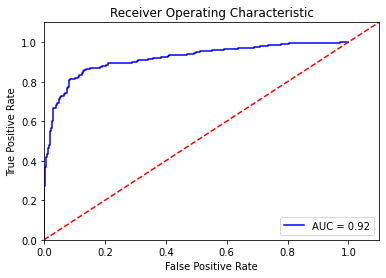

In [11]:
probs = model9.predict_proba(x_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)
print("Area under Curve:", roc_auc)
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1.1], [0, 1.1],'r--')
plt.xlim([0, 1.1])
plt.ylim([0, 1.1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

## Voting Based Classification
* Several independent classifiers are combined together.
* Output is generated from each of these classifiers.
* Their outputs are combined aand based on majority a single final output is generated.
* In our case we have combined Decision Tree, Random Forest, KNN, SVM and XGBoost, Logistic Regression and Naive Bayes classifiers.

In [15]:
from sklearn.ensemble import VotingClassifier

estimator = []
model1 = DecisionTreeClassifier()
estimator.append(('DT', model1))
model2 = RandomForestClassifier()
estimator.append(('RF', model2))
model3 = KNeighborsClassifier()
estimator.append(('KNN', model3))
model4 = SVC(kernel='rbf',probability=True)
estimator.append(('SVMR', model4))
model5 = XGBClassifier(verbosity = 0)
estimator.append(('XGB', model5))
model6 = LogisticRegression()
estimator.append(('LR', model6))
model7 = GaussianNB()
estimator.append(('NB', model7))

vot = VotingClassifier(estimators = estimator, voting ='soft')

#'RF__n_estimators': [20, 200],

params = {'DT__criterion': ['gini', 'entropy'], 'DT__max_depth': [2, 4, 8, 10], 'DT__max_features': ["auto","log2","sqrt",None],   
          'KNN__n_neighbors': list(range(1,30)), 'KNN__leaf_size': list(range(1,50)), 'KNN__p': [1,2],
          'LR__C': [100, 10, 1.0, 0.1, 0.01], 'LR__penalty': ['l1', 'l2'], 'LR__solver': ['newton-cg', 'lbfgs', 'liblinear']}


grid_search = GridSearchCV(vot, params, cv=4, scoring='accuracy', return_train_score=True, refit=True)
grid_search.fit(x_train, y_train)
print(grid_search.best_estimator_)

#vot.fit(x_train, y_train)
#y_pred0 = vot.predict_proba(x_test)

[12:50:10] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:50:12] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:50:13] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:50:14] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[12:51:00] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:51:02] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:51:03] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:51:05] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[12:51:53] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:51:55] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:51:56] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:51:58] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[12:52:47] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:52:49] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:52:52] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:52:54] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[12:53:43] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:53:45] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:53:47] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:53:50] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[12:54:37] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:54:39] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:54:41] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:54:44] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[12:55:31] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:55:33] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:55:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:55:37] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[12:56:25] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:56:27] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:56:29] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:56:31] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[12:57:18] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:57:20] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:57:21] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:57:23] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[12:58:10] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:58:12] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:58:13] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:58:15] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[12:59:03] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:59:04] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:59:06] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:59:08] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[12:59:56] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:59:58] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:00:00] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:00:03] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[13:00:50] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:00:53] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:00:55] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:00:57] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[13:01:45] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:01:47] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:01:49] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:01:51] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[13:02:39] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:02:41] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:02:43] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:02:45] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[13:03:33] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:03:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:03:37] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:03:39] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[13:04:26] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:04:28] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:04:29] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:04:31] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[13:05:18] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:05:20] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:05:21] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:05:23] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[13:06:10] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:06:11] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:06:13] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:06:15] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[13:07:03] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:07:05] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:07:07] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:07:10] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[13:07:58] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:08:00] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:08:02] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:08:05] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[13:08:52] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:08:55] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:08:57] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:08:59] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[13:09:47] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:09:49] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:09:52] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:09:54] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[13:10:41] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:10:44] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:10:46] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:10:48] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[13:11:36] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:11:37] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:11:39] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:11:40] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[13:12:27] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:12:29] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:12:30] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:12:32] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[13:13:20] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:13:21] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:13:23] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:13:25] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[13:14:12] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:14:15] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:14:17] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:14:19] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[13:15:08] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:15:10] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:15:12] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:15:15] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[13:16:03] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:16:06] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:16:08] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:16:10] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[13:17:05] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:17:08] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:17:11] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:17:14] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[13:18:10] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:18:13] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:18:16] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:18:20] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[13:19:18] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:19:20] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:19:22] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:19:24] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[13:20:19] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:20:21] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:20:22] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:20:24] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[13:21:16] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:21:17] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:21:19] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:21:21] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[13:22:12] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:22:15] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:22:17] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:22:20] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[13:23:17] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:23:19] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:23:22] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:23:24] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[13:24:18] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:24:20] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:24:22] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:24:25] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[13:25:15] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:25:17] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:25:19] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:25:22] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[13:26:12] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:26:14] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:26:17] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:26:19] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[13:27:09] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:27:11] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:27:12] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:27:14] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[13:28:04] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:28:05] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:28:07] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:28:08] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[13:28:58] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:28:59] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:29:01] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:29:03] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[13:29:52] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:29:54] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:29:57] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:29:59] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[13:30:48] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:30:50] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:30:52] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:30:54] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[13:31:45] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:31:48] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:31:50] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:31:52] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[13:32:45] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:32:48] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:32:50] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:32:53] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[13:33:44] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:33:46] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:33:49] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:33:51] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[13:34:42] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:34:43] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:34:45] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:34:46] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[13:35:39] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:35:41] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:35:43] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:35:45] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[13:36:37] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:36:38] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:36:40] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:36:42] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[13:37:37] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:37:40] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:37:42] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:37:44] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[13:38:33] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:38:36] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:38:38] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:38:40] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[13:39:28] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:39:31] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:39:33] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:39:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[13:40:24] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:40:26] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:40:29] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:40:31] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[13:41:20] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:41:23] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:41:25] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:41:27] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[13:42:18] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:42:20] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:42:21] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:42:23] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[13:43:12] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:43:14] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:43:15] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:43:17] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[13:44:08] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:44:10] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:44:11] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:44:13] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[13:45:02] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:45:04] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:45:07] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:45:09] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[13:45:57] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:46:00] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:46:02] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:46:04] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[13:46:53] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:46:55] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:46:57] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:47:00] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[13:47:48] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:47:50] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:47:53] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:47:55] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[13:48:44] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:48:46] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:48:48] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:48:51] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[13:49:40] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:49:41] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:49:43] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:49:44] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[13:50:33] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:50:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:50:36] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:50:38] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[13:51:27] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:51:29] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:51:30] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:51:32] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[13:52:21] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:52:24] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:52:26] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:52:28] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[13:53:17] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:53:20] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:53:22] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:53:24] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[13:54:13] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:54:15] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:54:18] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:54:20] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[13:55:08] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:55:11] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:55:13] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:55:15] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[13:56:04] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:56:06] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:56:09] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:56:11] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[13:57:00] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:57:02] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:57:03] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:57:05] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[13:57:54] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:57:56] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:57:57] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:57:59] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[13:58:48] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:58:49] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:58:51] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:58:53] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[13:59:42] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:59:45] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:59:47] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:59:49] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[14:00:39] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:00:42] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:00:44] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:00:46] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[14:01:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:01:37] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:01:39] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:01:42] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[14:02:30] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:02:33] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:02:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:02:37] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[14:03:26] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:03:29] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:03:31] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:03:33] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[14:04:22] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:04:23] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:04:25] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:04:26] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[14:05:15] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:05:17] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:05:18] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:05:20] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[14:06:09] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:06:11] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:06:12] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:06:14] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[14:07:04] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:07:06] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:07:08] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:07:11] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[14:07:59] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:08:02] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:08:04] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:08:07] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[14:08:55] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:08:58] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:09:00] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:09:02] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[14:09:51] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:09:53] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:09:55] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:09:57] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[14:10:46] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:10:48] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:10:50] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:10:53] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[14:11:41] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:11:43] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:11:44] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:11:46] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[14:12:34] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:12:36] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:12:37] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:12:39] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[14:13:29] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:13:30] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:13:32] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:13:34] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[14:14:23] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:14:25] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:14:28] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:14:30] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[14:15:19] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:15:22] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:15:24] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:15:26] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[14:16:16] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:16:18] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:16:20] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:16:23] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[14:17:11] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:17:14] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:17:16] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:17:18] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[14:18:07] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:18:09] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:18:12] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:18:14] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[14:19:02] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:19:04] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:19:05] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:19:07] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[14:19:55] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:19:57] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:19:58] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:20:00] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[14:20:48] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:20:49] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:20:51] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:20:53] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[14:21:46] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:21:49] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:21:51] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:21:54] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[14:22:53] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:22:56] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:22:59] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:23:01] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[14:24:01] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:24:03] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:24:06] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:24:08] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[14:25:05] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:25:07] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:25:10] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:25:12] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[14:26:08] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:26:10] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:26:12] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:26:15] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[14:27:06] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:27:07] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:27:09] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:27:10] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[14:28:00] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:28:02] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:28:03] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:28:05] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[14:28:55] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:28:56] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:28:58] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:29:00] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[14:29:50] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:29:53] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:29:55] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:29:57] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[14:30:47] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:30:50] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:30:52] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:30:55] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[14:31:46] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:31:48] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:31:50] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:31:53] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[14:32:44] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:32:46] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:32:49] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:32:51] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[14:33:43] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:33:45] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:33:48] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:33:50] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[14:34:41] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:34:43] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:34:44] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:34:46] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[14:35:37] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:35:39] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:35:41] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:35:42] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[14:36:44] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:36:46] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:36:49] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:36:53] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[14:38:01] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:38:04] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:38:06] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:38:09] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[14:39:17] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:39:20] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:39:23] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:39:26] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[14:40:22] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:40:25] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:40:29] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:40:32] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[14:41:37] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:41:40] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:41:42] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:41:44] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[14:42:52] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:42:56] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:42:58] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:43:02] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[14:44:07] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:44:09] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:44:10] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:44:12] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[14:45:19] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:45:21] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:45:24] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:45:26] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[14:46:34] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:46:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:46:37] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:46:39] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[14:47:31] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:47:34] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:47:36] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:47:38] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[14:48:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:48:38] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:48:40] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:48:43] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[14:49:52] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:49:56] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:50:00] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:50:03] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[14:51:12] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:51:14] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:51:17] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:51:21] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[14:52:30] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:52:34] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:52:37] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:52:40] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[14:53:50] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:53:52] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:53:53] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:53:56] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[14:54:58] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:55:00] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:55:01] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:55:03] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[14:55:51] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:55:53] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:55:54] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:55:57] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[14:56:47] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:56:49] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:56:52] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:56:54] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[14:57:43] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:57:45] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:57:47] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:57:50] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[14:58:38] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:58:40] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:58:43] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:58:45] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[14:59:34] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:59:36] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:59:38] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:59:41] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[15:00:34] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:00:37] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:00:39] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:00:41] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[15:01:33] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:01:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:01:37] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:01:40] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

KeyboardInterrupt: 

In [ ]:
log_reg = grid_search.best_estimator_
print('Best model:',grid_search.best_estimator_)
log_reg.fit(X_train, y_train)

In [19]:
y_pred =[]
for i in range (len(y_pred0)):
    if y_pred0[i][0] >= 0.5: y_pred.append(0)
    else: y_pred.append(1)
y_pred = np.asarray(y_pred)
y_pred.shape

(972,)

In [20]:
print("Voting Classifier")
print("Train Accuracy:",vot.score(x_train, y_train))
print("Test Accuracy:",vot.score(x_test, y_test))

tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
print('\nConfusion Matrix:\n',confusion_matrix(y_test, y_pred))

print('\n+ve Precision:', tp/(tp+fp))
print('Recall:', tp/(tp+fn))
print('-ve Precision:', tn/(tn+fn))
print('Specificity:', tn/(tn+fp))
print("F1 Score: ",metrics.f1_score(y_test, y_pred))

Voting Classifier
Train Accuracy: 0.9714359238291302
Test Accuracy: 0.8806584362139918

Confusion Matrix:
 [[451  47]
 [ 69 405]]

+ve Precision: 0.8960176991150443
Recall: 0.8544303797468354
-ve Precision: 0.8673076923076923
Specificity: 0.9056224899598394
F1 Score:  0.8747300215982721


#### Based on the initial predictions where the threshold was set at 0.5, we observed that we were getting a higher number of false negatives.
#### To reduce this number, we increased the threshold for positive class to 0.55.

In [23]:
y_pred =[]
for i in range (len(y_pred0)):
    if y_pred0[i][0] > 0.55: y_pred.append(0)
    else: y_pred.append(1)
y_pred = np.asarray(y_pred)
y_pred.shape

(972,)

In [24]:
print("Voting Classifier")
print("Train Accuracy:",vot.score(x_train, y_train))
print("Test Accuracy:",vot.score(x_test, y_test))

tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
print('\nConfusion Matrix:\n',confusion_matrix(y_test, y_pred))

print('\n+ve Precision:', tp/(tp+fp))
print('Recall:', tp/(tp+fn))
print('-ve Precision:', tn/(tn+fn))
print('Specificity:', tn/(tn+fp))
print("F1 Score: ",metrics.f1_score(y_test, y_pred))

Voting Classifier
Train Accuracy: 0.9714359238291302
Test Accuracy: 0.8806584362139918

Confusion Matrix:
 [[438  60]
 [ 63 411]]

+ve Precision: 0.8726114649681529
Recall: 0.8670886075949367
-ve Precision: 0.874251497005988
Specificity: 0.8795180722891566
F1 Score:  0.8698412698412699


Area under Curve: 0.9497481684981685


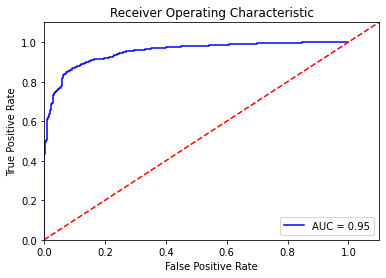

In [23]:
probs = vot.predict_proba(x_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)
print("Area under Curve:", roc_auc)
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1.1], [0, 1.1],'r--')
plt.xlim([0, 1.1])
plt.ylim([0, 1.1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [25]:
pickle.dump(vot, open("vote.pkl","wb"))

## Individual Image Prediction

### Postitive Image
* The images being used here are taken directly without any preprocessing.
* First preprocessing steps like applying low pass filter, high pass filter, gamma transformation is done.
* Then feature are extracted using FAST-FREAK.
* Cluster predictions are made using KMeans.
* Standrdization and dimensionality reduction is done.
* Values are given to the already trained classifiers.
* Prediction is made

In [27]:
import pickle 

data=[]
path=r"../test_data/positive/5.jpg"

a=cv2.imread(path, 0)
resize=(198,120)
img=cv2.resize(a,resize)

#low pass filter....blur and remove noise
kernel = np.ones((3,3),dtype = 'uint8')/9 
img1 = cv2.filter2D(img,-1,kernel)
    
#high pass filter....sharpen the image and enhances the edges
kernel = np.array([[-1, -1, -1], [-1, 8, -1], [-1, -1, -1]])
img2 = cv2.filter2D(img1,-1,kernel)
    
#gamma transformation....brighten the image
img2 = np.array(255*(img2 / 255) ** 0.5, dtype = 'uint8')

#feature extraction
fast = cv2.FastFeatureDetector_create() 
keypoints = fast.detect(img2, None)

freak = cv2.xfeatures2d.FREAK_create()
freakExtractor = cv2.xfeatures2d.FREAK_create()
keypoints, descriptors= freakExtractor.compute(img2 ,keypoints)

out=pd.DataFrame(descriptors)
print("Descriptor Shape:",out.shape)

array_double = np.array(out, dtype=np.double)

with open(r"Kmeans_CL_Model19.sav", "rb") as input_file:
    kmeans = pickle.load(input_file)
    
a=kmeans.predict(array_double)

hist=np.histogram(a,bins=[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20])

data.append(hist[0]/len(keypoints))

Output = pd.DataFrame(data)
Output = Output.iloc[:,0:19].values

sf = standard(Output)

pca = pickle.load(open("pca.pkl",'rb'))
pca1 = pca.transform(sf)

model8 = pickle.load(open("vote.pkl",'rb'))
y_pred1 = model8.predict_proba(pca1)
if y_pred1[0][0] > 0.55:
    ans = 0
else:
    ans = 1

print('Probabilities:', y_pred1)
print('Prediction:', ans)

Descriptor Shape: (667, 64)
Probabilities: [[0.83039393 0.16960608]]
Prediction: 0


### Negative Image

In [28]:
import pickle 

data=[]
path=r"../test_data/negative/5.jpg"

a=cv2.imread(path, 0)
resize=(198,120)
img=cv2.resize(a,resize)

kernel = np.ones((3,3),dtype = 'uint8')/9 
img1 = cv2.filter2D(img,-1,kernel)
kernel = np.array([[-1, -1, -1], [-1, 8, -1], [-1, -1, -1]])
img2 = cv2.filter2D(img1,-1,kernel)
img2 = np.array(255*(img2 / 255) ** 0.5, dtype = 'uint8')

fast = cv2.FastFeatureDetector_create() 
keypoints = fast.detect(img2, None)

freak = cv2.xfeatures2d.FREAK_create()
freakExtractor = cv2.xfeatures2d.FREAK_create()
keypoints, descriptors= freakExtractor.compute(img2 ,keypoints)

out=pd.DataFrame(descriptors)
print("Descriptor Shape:",out.shape)

array_double = np.array(out, dtype=np.double)

with open(r"Kmeans_CL_Model19.sav", "rb") as input_file:
    kmeans = pickle.load(input_file)
    
a=kmeans.predict(array_double)

hist=np.histogram(a,bins=[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20])
data.append(hist[0]/len(keypoints))

Output = pd.DataFrame(data)
Output = Output.iloc[:,0:19].values

sf = standard(Output)

pca = pickle.load(open("pca.pkl",'rb'))
pca1 = pca.transform(sf)

model8 = pickle.load(open("vote.pkl",'rb'))
y_pred1 = model8.predict_proba(pca1)

if y_pred1[0][0] > 0.55:
    ans = 0
else:
    ans = 1

print('Probabilities:', y_pred1)
print('Prediction:', ans)

Descriptor Shape: (835, 64)
Probabilities: [[0.23572498 0.76427502]]
Prediction: 1


### Confusion Matrix Output
* tn  fp
* fn  tp

## Testing Data

* Perform all the same steps done on training data like feature extraction, clustering, dimensionality reduction on testing data as well.
* Then using the already trained models, make predictions on the testing data

In [5]:
folder1='../test_data/positive'
i=0
data=[]
for filename in os.listdir(folder1):
    #path
    path=os.path.join(folder1,filename)
    a=cv2.imread(path)
    resize=(198,120)
    img=cv2.resize(a,resize)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    
    kernel = np.ones((3,3),dtype = 'uint8')/9 
    img1 = cv2.filter2D(img,-1,kernel)
    kernel = np.array([[-1, -1, -1], [-1, 8, -1], [-1, -1, -1]])
    img2 = cv2.filter2D(img1,-1,kernel)
    img2 = np.array(255*(img2 / 255) ** 0.5, dtype = 'uint8')
    
    fast = cv2.FastFeatureDetector_create() 
    keypoints = fast.detect(img2, None)

    freak = cv2.xfeatures2d.FREAK_create()
    freakExtractor = cv2.xfeatures2d.FREAK_create()
    keypoints, descriptors= freakExtractor.compute(img2 ,keypoints)
    
    out=pd.DataFrame(descriptors)
  
    array_double = np.array(out, dtype=np.double)
    
    with open(r"Kmeans_CL_Model19.sav", "rb") as input_file:
        kmeans = pickle.load(input_file)
    
    a=kmeans.predict(array_double)
    
    hist=np.histogram(a,bins=[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20])
    
    data.append(hist[0]/len(keypoints))
        
Output = pd.DataFrame(data)
Output["Class"] = i

In [6]:
folder1='../test_data/negative'
i=1
data=[]
for filename in os.listdir(folder1):
    
    path=os.path.join(folder1,filename)
    print(path)
    a=cv2.imread(path)
    resize=(198,120)
    img=cv2.resize(a,resize)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    
    kernel = np.ones((3,3),dtype = 'uint8')/9 
    img1 = cv2.filter2D(img,-1,kernel)
    kernel = np.array([[-1, -1, -1], [-1, 8, -1], [-1, -1, -1]])
    img2 = cv2.filter2D(img1,-1,kernel)
    img2 = np.array(255*(img2 / 255) ** 0.5, dtype = 'uint8')
    
    fast = cv2.FastFeatureDetector_create() 
    keypoints = fast.detect(img2, None)

    freak = cv2.xfeatures2d.FREAK_create()
    freakExtractor = cv2.xfeatures2d.FREAK_create()
    keypoints, descriptors= freakExtractor.compute(img2 ,keypoints)
    
    out=pd.DataFrame(descriptors)
  
    array_double = np.array(out, dtype=np.double)
    
    with open(r"Kmeans_CL_Model19.sav", "rb") as input_file:
        kmeans = pickle.load(input_file)
    
    a=kmeans.predict(array_double)
    
    hist=np.histogram(a,bins=[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20])
    
    data.append(hist[0]/len(keypoints))
        
Output1 = pd.DataFrame(data)
Output1["Class"] = i

../test_data/negative\1.jpg
../test_data/negative\10.jpg
../test_data/negative\100.jpg
../test_data/negative\1000_F_344107077_xii9puW5aWHx1p1CME7iDoTWlE6l8gMw.jpg
../test_data/negative\101.jpg
../test_data/negative\102.jpg
../test_data/negative\103.jpg
../test_data/negative\104.jpg
../test_data/negative\104063746.jpg
../test_data/negative\105.jpg
../test_data/negative\106.jpg
../test_data/negative\107.jpg
../test_data/negative\108.jpg
../test_data/negative\109.jpg
../test_data/negative\11.jpg
../test_data/negative\110.jpg
../test_data/negative\111.jpg
../test_data/negative\112.jpg
../test_data/negative\113.jpg
../test_data/negative\114.jpg
../test_data/negative\115.jpg
../test_data/negative\116.jpg
../test_data/negative\117.jpg
../test_data/negative\118.jpg
../test_data/negative\119.jpg
../test_data/negative\12.jpg
../test_data/negative\120.jpg
../test_data/negative\121.jpg
../test_data/negative\122.jpg
../test_data/negative\123.jpg
../test_data/negative\124.jpg
../test_data/negative\1

../test_data/negative\588.jpg
../test_data/negative\589.jpg
../test_data/negative\59.jpg
../test_data/negative\590.jpg
../test_data/negative\591.jpg
../test_data/negative\592.jpg
../test_data/negative\593.jpg
../test_data/negative\594.jpg
../test_data/negative\595.jpg
../test_data/negative\596.jpg
../test_data/negative\597.jpg
../test_data/negative\598.jpg
../test_data/negative\599.jpg
../test_data/negative\6.jpg
../test_data/negative\60.jpg
../test_data/negative\600.jpg
../test_data/negative\601.jpg
../test_data/negative\602.jpg
../test_data/negative\603.jpg
../test_data/negative\604.jpg
../test_data/negative\605.jpg
../test_data/negative\606.jpg
../test_data/negative\607.jpg
../test_data/negative\608.jpg
../test_data/negative\609.jpg
../test_data/negative\61.jpg
../test_data/negative\610.jpg
../test_data/negative\611.jpg
../test_data/negative\612.jpg
../test_data/negative\613.jpg
../test_data/negative\614.jpg
../test_data/negative\615.jpg
../test_data/negative\616.jpg
../test_data/ne

../test_data/negative\Japan_012378.jpg
../test_data/negative\Japan_012381.jpg
../test_data/negative\Japan_012382.jpg
../test_data/negative\Japan_012383.jpg
../test_data/negative\Japan_012389.jpg
../test_data/negative\Japan_012391.jpg


In [12]:
A=Output.append(Output1)
x = A.iloc[:,0:19].values
y = A.iloc[:,-1].values
x_scaled = standard(x)

pca = pickle.load(open("pca.pkl",'rb'))
pca1 = pca.transform(x_scaled)
x_reduced = pd.DataFrame(pca1)
B=pd.concat([x_reduced, pd.DataFrame(y)],axis=1)
data = B
x = data.iloc[:,0:17].values
y = data.iloc[:,-1]

    
model8 = pickle.load(open("vote.pkl",'rb'))
thr=0.55
y_pred8 = np.where(model8.predict_proba(x)[:,0] >= thr, 0, 1)
#y_pred8 = model8.predict(x)
print("Accuracy:",model8.score(x, y))

tn, fp, fn, tp = confusion_matrix(y, y_pred8).ravel()
print('\nConfusion Matrix:\n',confusion_matrix(y, y_pred8))

print('\n+ve Precision:', tp/(tp+fp))
print('Recall:', tp/(tp+fn))
print('-ve Precision:', tn/(tn+fn))
print('Specificity:', tn/(tn+fp))
print("F1 Score: ",metrics.f1_score(y, y_pred8))

Accuracy: 0.8835913312693499

Confusion Matrix:
 [[714  94]
 [ 93 714]]

+ve Precision: 0.8836633663366337
Recall: 0.8847583643122676
-ve Precision: 0.8847583643122676
Specificity: 0.8836633663366337
F1 Score:  0.8842105263157893


Area under Curve: 0.9444066153827277


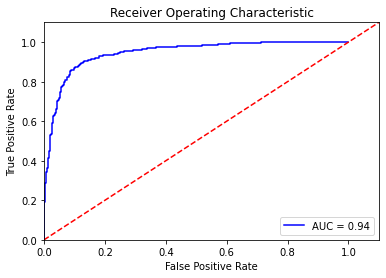

In [13]:
probs = model8.predict_proba(x)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y, preds)
roc_auc = metrics.auc(fpr, tpr)
print("Area under Curve:", roc_auc)
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1.1], [0, 1.1],'r--')
plt.xlim([0, 1.1])
plt.ylim([0, 1.1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# Vehicle Detection, Tracking in video & Speed Estimation

In [ ]:
import cv2
import dlib
import time
import threading
import math
import imutils
import numpy as np
import pandas as pd
import pickle
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import MinMaxScaler

In [ ]:
video = cv2.VideoCapture('cars.mp4')
WIDTH, HEIGHT = 720, 480

In [ ]:
def standard(data):
    mean = np.mean(data)
    std_dev = np.std(data)
    ans=[]
    for i in data:
        s = (i-mean)/std_dev
        ans.append(s)
    return ans

## Prediction Function:
* Takes the descriptor for the particular window.
* Predicts whether the window has a car or not in it.

In [ ]:
def prediction(descriptors, keypoints):
    data=[]
    out=pd.DataFrame(descriptors)

    array_double = np.array(out, dtype=np.double)

    with open(r"Kmeans_CL_Model19.sav", "rb") as input_file:
        kmeans = pickle.load(input_file)

    a=kmeans.predict(array_double)
    hist=np.histogram(a,bins=[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20])
    data.append(hist[0]/len(keypoints))

    Output = pd.DataFrame(data)
    Output = Output.iloc[:,0:19].values

    sf = standard(Output)
    pca = pickle.load(open("pca.pkl",'rb'))
    pca1 = pca.transform(sf)
    model8 = pickle.load(open("vote.pkl",'rb'))
    y_pred1 = model8.predict_proba(pca1)
    
    if y_pred1[0][0] > 0.78:
        ans = 0
    else:
        ans = 1

    return ans

## Sliding Window:
* A window of size 80*80 will be slided all over the frames of the video.
* For every window the feature vectors will be extracted using FAST-FREAK
* The coordinates of every window and the descriptors for every window will be stored.

In [ ]:
def slideExtract(image,windowSize=(80,80),step=40):
    
    coords = []
    features = []
    
    hIm,wIm = image.shape[:2] 

    for w1,w2 in zip(range(0,wIm-windowSize[0],step),range(windowSize[0],wIm,step)):       
        for h1,h2 in zip(range(0,hIm-windowSize[1],step),range(windowSize[1],hIm,step)):
            
            window = image[h1:h2,w1:w2]
            
            if window.shape[0]>0 and window.shape[1]>0:
                
                resize=(198,120)
                img=cv2.resize(window,resize)
                gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
                kernel = np.ones((3,3),dtype = 'uint8')/9 
                img1 = cv2.filter2D(img,-1,kernel)
                kernel = np.array([[-1, -1, -1], [-1, 8, -1], [-1, -1, -1]])
                img2 = cv2.filter2D(img1,-1,kernel)
                img2 = np.array(255*(img2 / 255) ** 0.5, dtype = 'uint8')
                            
                fast = cv2.FastFeatureDetector_create() 
                keypoints = fast.detect(img2, None)
                freak = cv2.xfeatures2d.FREAK_create()
                freakExtractor = cv2.xfeatures2d.FREAK_create()
                keypoints, descriptors= freakExtractor.compute(img2 ,keypoints)
                
                if descriptors is None:
                    d = np.ones((1,64))
                    features.append(d)
                else:
                    features.append(descriptors)
                
                coords.append((w1,w2,h1,h2))
            
    return (coords, features)

## Heatmap:
* A complete black image the same size as the original frame is created.
* If a window has a car, the part of window is selected in the black image and the pixel values are increased.
* If a window does not have a car, the part of window is selected in the black image and the pixel values are decreased.

In [ ]:
class Heatmap():
    
    def __init__(self,original_image):
        
        self.mask = np.zeros(original_image.shape[:2]) ##complete black image
    
    def incValOfReg(self,coords):
        w1,w2,h1,h2 = coords
        self.mask[h1:h2,w1:w2] = self.mask[h1:h2,w1:w2] + 50
    
    def decValOfReg(self,coords):
        w1,w2,h1,h2 = coords
        self.mask[h1:h2,w1:w2] = self.mask[h1:h2,w1:w2] - 50
    
    def compileHeatmap(self):

        scaler = MinMaxScaler()        
        self.mask = scaler.fit_transform(self.mask)
        self.mask = np.asarray(self.mask * 255).astype(np.uint8)
        
        # Now we'll threshold our mask, if a value is higher than 180, it will be white else it will be black
        self.mask = cv2.inRange(self.mask,180,255)
        
        return self.mask

## Detect Car
* For every window check if it has a car or not
* Get the final heatmap
* Find contours(boxes) in the heatmap.
* Get the coordinates of these contours which will be the coordinates of the cars.

In [ ]:
def detect_car(image):
    
    # Extracting features and initalizing heatmap
    coords,features = slideExtract(image)
    htmp = Heatmap(image)
    cars=[]
    
    for i in range(len(features)):
        # If region is positive then add some heat
        decision = prediction(features[i])
        if decision == 0:
            htmp.incValOfReg(coords[i])
            # Else remove some heat
        else:
            htmp.decValOfReg(coords[i])
    
    # Compiling heatmap
    mask = htmp.compileHeatmap()
    
    cont,_ = cv2.findContours(mask,1,2)[:2]
    for c in cont:
        # If a contour is small don't consider it
        if cv2.contourArea(c) < 40*40:
            continue
        
        (x,y,w,h) = cv2.boundingRect(c)
        gh = (x,y,w,h)
        cars.append(gh)
    
    return cars

In [ ]:
def estimateSpeed(location1, location2, fps):
    d_pixels = math.sqrt(math.pow(location2[0] - location1[0], 2) + math.pow(location2[1] - location1[1], 2))
    ppm = 8.8
    d_meters = d_pixels / ppm
    speed = d_meters * fps * 3.6
    return speed

## Speed Calculation
* Speed = Distance/Time
* Distance has been predefined based on actual value
* Time: No of frames required to cross the lines is calculated and divided with the frames per second (fps) of the video.
* To convert to Kilometer per hour value is multiplied by 3.6

In [ ]:
def get_speed(fs, fe, fps):
    time = (fe-fs)/fps
    dist = 15
    speed = (dist/time) * 3.6
    return speed    

In [ ]:
def trackMultipleObjects():
    rectangleColor = (0, 255, 0)
    frameCounter = 0
    currentCarID = 0
    fps = video.get(cv2.CAP_PROP_FPS)
    
    carTracker = {}
    carNumbers = {}
    carLocation1 = {}
    carLocation2 = {}
    frame_start = {}
    frame_end = {}
    only_car=[]
    fs=0
    fe=0
    speed = [None] * 1000
    speed_f = [None] * 1000
    
    fourcc = cv2.VideoWriter_fourcc(*'XVID')
    output = cv2.VideoWriter('cars_output.mp4', fourcc, fps, (720, 480))
    
    while True:
        rc, image = video.read()
        if type(image) == type(None):
            break
        
        image = cv2.resize(image, (WIDTH, HEIGHT))
        resultImage = image.copy()
        
        frameCounter = frameCounter + 1
        
        carIDtoDelete = []

        for carID in carTracker.keys():
            trackingQuality = carTracker[carID].update(image) ##measures how confident the tracker is that the object is inside #get_position()
            
            if trackingQuality < 6:
                carIDtoDelete.append(carID) ## if confidence is less, dont track it.
                
        for carID in carIDtoDelete:
            carTracker.pop(carID, None)
            carLocation1.pop(carID, None)
            carLocation2.pop(carID, None)
        
        if not (frameCounter % 10):
            #gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
            img = cv2.resize(image, (720,480))
            cars = detect_car(img)
            
            for (_x, _y, _w, _h) in cars:
                x = int(_x)
                y = int(_y)
                w = int(_w)
                h = int(_h)
            
                x_bar = x + 0.5 * w
                y_bar = y + 0.5 * h
                
                matchCarID = None
            
                for carID in carTracker.keys():
                    trackedPosition = carTracker[carID].get_position() ##gets position of the tracked car
                    
                    t_x = int(trackedPosition.left())
                    t_y = int(trackedPosition.top())
                    t_w = int(trackedPosition.width())
                    t_h = int(trackedPosition.height())
                    
                    t_x_bar = t_x + 0.5 * t_w
                    t_y_bar = t_y + 0.5 * t_h
                                    
                    #to check if the newly detected car is already detected and tracked before
                    if (((t_x <= x_bar <= (t_x + t_w)) and (t_y <= y_bar <= (t_y + t_h))) or ((x <= t_x_bar <= (x + w )) and (y <= t_y_bar <= (y + h)))):
                        matchCarID = carID
                
                if matchCarID is None:
                    
                    tracker = dlib.correlation_tracker() ##initialze tracker
                    tracker.start_track(image, dlib.rectangle(x, y, x + w, y + h)) ##give the org image and the coordinates of the part which need to be tracked
                    
                    carTracker[currentCarID] = tracker

                    carLocation1[currentCarID] = [x, y, w, h] ##initialize the starting location

                    currentCarID = currentCarID + 1

        for carID in carTracker.keys():
            trackedPosition = carTracker[carID].get_position()
                    
            t_x = int(trackedPosition.left())
            t_y = int(trackedPosition.top())
            t_w = int(trackedPosition.width())
            t_h = int(trackedPosition.height())
            
            if t_y+(t_h/2)>=310 and t_y+(t_h/2)<330:
                frame_start[carID] = frameCounter  ##when the vehicle crosses the starting line store the frame no.
            
            if t_y+(t_h/2)>=155 and t_y+(t_h/2)<175:
                frame_end[carID] = frameCounter  ##when the vehicle crosses the finish line store the frame no.
            carLocation2[carID] = [t_x, t_y, t_w, t_h]  ##store the new coordinates

        for i in carLocation1.keys():
            if frameCounter % 1 == 0:
                [x1, y1, w1, h1] = carLocation1[i]
                [x2, y2, w2, h2] = carLocation2[i]
        
                carLocation1[i] = [x2, y2, w2, h2]
        
                if [x1, y1, w1, h1] != [x2, y2, w2, h2]:
                    if (speed[i] == None or speed[i] == 0) and y1 >= 225 and y1 <= 305:
                        speed[i] = estimateSpeed([x1, y1, w1, h1], [x2, y2, w2, h2], fps)

                    if speed[i] != None and speed[i] >5 and y1 >= 90 and x1>100 and x1<480:
                        cv2.rectangle(resultImage, (x1, y1), (x1 + w1, y1 + h1), rectangleColor, 4)
                        only_car.append(i)
        
        for j in frame_end.keys():
            if j in frame_start and j in only_car and j in carLocation2:
                fs = frame_start[j]
                fe = frame_end[j]
                x1, y1, w1, h1 = carLocation2[j]
                if (speed_f[j] == None or speed_f[j] == 0):
                    speed_f[j] = get_speed(fs, fe, fps)
                    #print('Speed:',j,speed_f[j])

                if speed_f[j] != None and speed_f[j] >0 and y1 <= 200 and y1>=100 and x1>100 and x1<480:
                    cv2.putText(resultImage, str(int(speed_f[j]))+"", (int(x1), int(y1-5)),cv2.FONT_HERSHEY_SIMPLEX, 0.75, (255, 255, 255), 2)
                
            else:
                continue
                
        cv2.line(resultImage, (0, 310), (960, 310), (0, 0, 255), 2) ##drawing start lines
        cv2.line(resultImage, (0, 330), (960, 330), (0, 0, 255), 2)

        cv2.line(resultImage, (0, 155), (960, 155), (0, 0, 255), 2) ##drawing finish lines
        cv2.line(resultImage, (0, 175), (960, 175), (0, 0, 255), 2)
        
        output.write(resultImage)
        cv2.imshow('result', resultImage)

        if cv2.waitKey(33) == 27:
            break
    
    output.release() 
    cv2.destroyAllWindows()

In [ ]:
trackMultipleObjects()